In [0]:
import pandas as pd
import numpy as np
import matplotlib as plt

In [0]:
from google.colab import files

In [0]:
files.upload()

In [0]:
data=pd.read_csv('train_data.csv')

In [0]:
data.head()

In [0]:
data.info()

In [0]:
data.replace({'?': np.nan,'--':np.nan},inplace=True)#check and replace the ? and - signs with nan values

In [0]:
#Lets start with the column with least amount of null values which is Electrical
data.Electrical.unique() #this gets us the unique values in the column

In [0]:
data.Electrical.value_counts()#this gives us the number of each unique value
#SBrkr has the most number and hence we assume the empty value should be placed here

In [0]:
data.Electrical.value_counts().plot(kind='barh')
#Plot a graph so as to see more


In [0]:
data[data.Electrical.isnull()]#check and see we only have one empty/nan entry in electrcial

In [0]:
data.groupby(['MSSubClass']).Electrical.value_counts()

From the above grouping we find that most of houses in the same MSSubclass(80)have Standard Circuit Breakers & Romex as their electrical hence it is safe to add this under the same category

In [0]:
data.Electrical.fillna('SBrkr',inplace=True)#fill the missing row with SBrkr

In [0]:
data[data.Electrical.isnull()]#check to see if there any remaining null enetries in the data set under the column Electrcial

In [0]:
data.info()

After investigating the data description we discover that most of the columns have the NA property to imply not available. 
Python has interpretead most as np.nan hence we have to investigate each null column to see if it truly is null or just miss interprated

In [0]:
#let's start with LotFrontage
data[data.LotFrontage.isnull()]

In [0]:
data.LotFrontage.unique()

In [0]:
data.groupby(['MSZoning']).LotFrontage.median().plot(kind='barh')

In [0]:
#hence using the relationship between the zoning area we use the median as a mean of predicting what values we should imput for the groups
data.groupby(['MSZoning']).LotFrontage.median()

In [0]:
data[data.MSZoning=='RM'].LotFrontage.value_counts()

In [0]:
data.MSZoning.value_counts()

In [0]:
data.info()

In [0]:
data[data.Alley.isnull()]

In [0]:
data.replace({'Alley':{np.nan: 'None'}},inplace=True)

In [0]:
data[data.Alley.isnull()]

In [0]:
data.info()

In [0]:
data[data.BsmtQual.isnull()]

From the above table we can conclude that there exists no basement in this house
As described also in the data description NA is no basement and henc it'll be safe to replace no basment to the Nan rows


In [0]:
data.replace({'BsmtQual':  { np.nan : 'None'}},inplace=True)

In [0]:
data.info()

The same should be done to the basement Condition

In [0]:
data.replace({'BsmtCond':   {np.nan: 'None' }},inplace=True)

In [0]:
data.info()

In [0]:
data[data.BsmtExposure.isnull()]

In [0]:
#Not so fast we do find that in row 948 there exists a basment hence we have to be careful on BsmtExposure
#so let's check for a relationship so we can assign it the next best value
groups=data.groupby(['BsmtQual','BsmtCond','BsmtFinType1']).BsmtExposure.value_counts()

From the above grouping we can see that having a Gd BsmtExposure and TA BsmtCondition has high chances that Bsmnt Exposure is None

In [0]:
#if we group it further we can see that including the Basement finish 1 we can solidly say it's probably right to give no exposure on this one 
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print (groups)

In [0]:
#we specifically pick the row and hence assign the value
data.loc[948,'BsmtExposure']='No'

In [0]:
#for the rest let us change the NaaN value to NoBas
data.replace({'BsmtExposure':{np.nan: 'NoBas'}},inplace=True)

In [0]:
data.info()

In [0]:
data[data.BsmtFinType1.isnull()]

In [0]:
data.replace({'BsmtFinType1':{np.nan: 'None'}},inplace=True)

In [0]:
data.info()

We can get the basment Finish Type 2 from looking at the Finish Square feet if this value is zero it's assumed you don have a Bsmt Finish 2

In [0]:
data[data.BsmtFinType2.isnull()]

We find another anormally we have to deal with row 332
It has a Finsishint 2 square foot but nothing has been filled in for Bsmt Finish 2 Type.
We can assume by grouping it according to it's Bsmt Finish type 1

In [0]:
groupings=data.groupby(['BsmtQual','BsmtCond','BsmtFinType1']).BsmtFinType2.value_counts()
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print (groupings)

In [0]:
#we setlle for unfinished as per the data given above
#hence
data.loc[332,'BsmtFinType2']='Unf'

In [0]:
data[data.BsmtFinType2.isnull()]

In [0]:
data.replace({'BsmtFinType2':{np.nan:'None'}},inplace=True)

In [0]:
data.info()

In [0]:
data[data.MasVnrType.isnull()]

In [0]:
exteriorlists=data.groupby(['YearBuilt','Exterior1st','Exterior2nd']).MasVnrType.value_counts()
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print (exteriorlists)

In [0]:
data.MasVnrType.value_counts()

In [0]:
data.replace({'MasVnrType': {np.nan: ' None'}},inplace=True)

In [0]:
data.MasVnrArea.value_counts()

In [0]:
data.replace({'MasVnrArea':{np.nan: 0.0}},inplace=True)

In [0]:
data.info()

In [0]:
featurez=data[data.MiscFeature.isnull()]
featurez

In [0]:
data.loc[data.MiscFeature=='Shed','MiscVal']

In [0]:
data.replace({'MiscFeature':{np.nan: 'None'}},inplace=True)

In [0]:
data.info()

In [0]:
data.replace({'Fence':{np.nan:'None'}},inplace=True)

In [0]:
data.info()

In [0]:
data[data.PoolQC.isnull()]

In [0]:
data.replace({'PoolQC':{np.nan:'No Pool'}},inplace=True)

In [0]:
data.info()

In [0]:
garages=data[data.GarageArea== 0].GarageArea
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print (garages)


In [0]:
# data[data.GarageArea== 0].replace({'GarageType':{np.nan: 'None'}},inplace=True)
data.loc[data.GarageArea ==0,'GarageType']='None'

In [0]:
data.info()

In [0]:
data.loc[data.GarageArea==0,'GarageYrBlt']= 0000.0# we fill in the year built as 0000 we will exclude this datatypes when calculating 

In [0]:
data.info()

In [0]:
data.loc[data.GarageArea==0,'GarageCond']='None'

In [0]:
data.info()

In [0]:
data.loc[data.GarageArea==0,'GarageQual']='None'

In [0]:
data.info()

In [0]:
data.loc[data.GarageArea==0,'GarageFinish']='None'

In [0]:
data.info()

In [0]:
data[data.FireplaceQu.isnull()]

In [0]:
data.loc[data.Fireplaces==0,'FireplaceQu']='None'

In [0]:
data.info()

In [0]:
data[data.LotFrontage.isnull()]

In [0]:
data.groupby(['MSZoning','MSSubClass']).LotFrontage.median()

In [0]:
data.LotFrontage.median()

In [0]:
data.LotFrontage.fillna(method='pad',inplace=True)

In [0]:
data.LotFrontage.median()

In [0]:
data.LotFrontage.mean()

In [0]:
data.info()

In [0]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LassoCV

In [0]:
nominal=['Alley','LotConfig','Neighborhood','BldgType','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','Foundation','Heating','GarageType','MiscFeature']
ordinal=['MSZoning','Street','LotShape','LandContour','LandSlope','Utilities','Condition1','Condition2','HouseStyle','ExterQual','ExterCond','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','HeatingQC','CentralAir','Electrical','KitchenQual','Functional','FireplaceQu','GarageFinish','GarageQual','GarageCond','PavedDrive','PoolQC','Fence','SaleType','SaleCondition']
numerical=['MSSubClass','YearBuilt','OverallQual','OverallCond','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','YearRemodAdd','LotFrontage','LotArea','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageYrBlt','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal','MoSold','YrSold']
target=['SalePrice']
categorical_data=data.select_dtypes(include=['object']).copy()
categorical_data

In [0]:
categorical_data.columns

In [0]:
column_names=list(categorical_data.columns)

In [0]:
column_names

In [0]:
for features in column_names:
  categorical_data[features]=categorical_data[features].astype('category')

In [0]:
for features in ordinal:
  categorical_data[features]=categorical_data[features].cat.codes


In [0]:
categorical_data.head()

In [0]:
data_copy=categorical_data.copy()
data_copy=pd.concat([pd.get_dummies(data_copy[nominal]),data_copy],axis=1)
data_copy.drop(nominal,axis=1,inplace=True)
data_copy

new_data=pd.concat([data_copy,data[numerical],data[target]],axis=1)
new_data


In [0]:
X=new_data.drop('SalePrice',1)
data_array=X.to_numpy()
data_array

In [0]:
all_features=list(data_copy.columns)
X=new_data.loc[:,all_features].values
y=new_data.loc[:,'SalePrice'].values
X

In [0]:
X=StandardScaler().fit_transform(X)
X

In [0]:
pca=PCA(n_components=2)
pca_s=pca.fit_transform(X)
pca_data=pd.DataFrame(pca_s,columns=['PC1','PC2'])
final_data=pd.concat([pca_data,data[target]],axis=1)

final_data


In [0]:
pca.explained_variance_ratio_

In [0]:
pca=PCA(0.9)

The two Principal Components carry 

In [0]:
features=['Alley','LotConfig','Neighborhood','BldgType','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','Foundation','Heating','GarageType','MiscFeature','MSZoning','Street','LotShape','LandContour','LandSlope','Utilities','Condition1','Condition2','HouseStyle','ExterQual','ExterCond','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','HeatingQC','CentralAir','Electrical','KitchenQual','Functional','FireplaceQu','GarageFinish','GarageQual','GarageCond','PavedDrive','PoolQC','Fence','SaleType','SaleCondition','MSSubClass','YearBuilt','OverallQual','OverallCond','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','YearRemodAdd','LotFrontage','LotArea','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageYrBlt','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal','MoSold','YrSold']
X=data.loc[:,features].values
target=['SalePrice']
y=data.loc[:,target].values
y

In [0]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

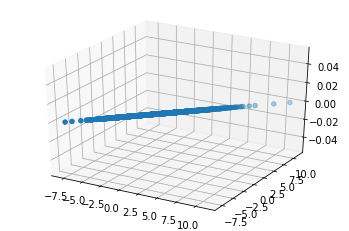

In [0]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
xs = pca_data
ys = pca_data

ax.scatter(xs,ys)
